# 1. Set libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB

# 2. Load data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/CSCI567/train_values.csv', index_col='building_id')
df2 = pd.read_csv('/content/drive/MyDrive/CSCI567/train_labels.csv', index_col='building_id')
df3 = pd.read_csv('/content/drive/MyDrive/CSCI567/test_values.csv', index_col='building_id') # test X

In [4]:
# Check the null counts and data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   damage_grade  260601 non-null  int64
dtypes: int64(1)
memory usage: 4.0 MB


In [6]:
df1.nunique()

geo_level_1_id                               31
geo_level_2_id                             1414
geo_level_3_id                            11595
count_floors_pre_eq                           9
age                                          42
area_percentage                              84
height_percentage                            27
land_surface_condition                        3
foundation_type                               5
roof_type                                     3
ground_floor_type                             5
other_floor_type                              4
position                                      4
plan_configuration                           10
has_superstructure_adobe_mud                  2
has_superstructure_mud_mortar_stone           2
has_superstructure_stone_flag                 2
has_superstructure_cement_mortar_stone        2
has_superstructure_mud_mortar_brick           2
has_superstructure_cement_mortar_brick        2
has_superstructure_timber               

In [34]:
df3.nunique()

geo_level_1_id                               31
geo_level_2_id                             1364
geo_level_3_id                            10213
count_floors_pre_eq                           8
age                                          13
area_percentage                              15
height_percentage                             8
land_surface_condition                        3
foundation_type                               5
roof_type                                     3
ground_floor_type                             5
other_floor_type                              4
position                                      4
plan_configuration                           10
has_superstructure_adobe_mud                  2
has_superstructure_mud_mortar_stone           2
has_superstructure_stone_flag                 2
has_superstructure_cement_mortar_stone        2
has_superstructure_mud_mortar_brick           2
has_superstructure_cement_mortar_brick        2
has_superstructure_timber               

In [7]:
df2.nunique()

damage_grade    3
dtype: int64

In [5]:
df_train = df1.merge(df2, on='building_id')
df_X = df_train.iloc[:,:38]
df_y = df_train.loc[:,'damage_grade']

In [6]:
# Size of training data
print('training data:')
print ("Num of rows: " + str(df_X.shape[0])) # row count
print ("Num of columns: " + str(df_X.shape[1])) # col count
print('test data:')
print ("Num of rows: " + str(df3.shape[0])) # row count
print ("Num of columns: " + str(df3.shape[1])) # col count

training data:
Num of rows: 260601
Num of columns: 38
test data:
Num of rows: 86868
Num of columns: 38


# 3. Exploratory data analysis

## 3.1 Check missing data

In [10]:
# Check missing data 
print("*** Missing Values ***")
print(df_X.isnull().sum())

*** Missing Values ***
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_super

In [11]:
# Check info
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

## 3.2 Check duplicated rows

In [12]:
df_check = pd.read_csv('/content/drive/MyDrive/CSCI567/train_values.csv')
# Check duplicated rows
df_check[df_check.duplicated()]

Empty DataFrame
Columns: [building_id, geo_level_1_id, geo_level_2_id, geo_level_3_id, count_floors_pre_eq, age, area_percentage, height_percentage, land_surface_condition, foundation_type, roof_type, ground_floor_type, other_floor_type, position, plan_configuration, has_superstructure_adobe_mud, has_superstructure_mud_mortar_stone, has_superstructure_stone_flag, has_superstructure_cement_mortar_stone, has_superstructure_mud_mortar_brick, has_superstructure_cement_mortar_brick, has_superstructure_timber, has_superstructure_bamboo, has_superstructure_rc_non_engineered, has_superstructure_rc_engineered, has_superstructure_other, legal_ownership_status, count_families, has_secondary_use, has_secondary_use_agriculture, has_secondary_use_hotel, has_secondary_use_rental, has_secondary_use_institution, has_secondary_use_school, has_secondary_use_industry, has_secondary_use_health_post, has_secondary_use_gov_office, has_secondary_use_use_police, has_secondary_use_other]
Index: []

[0 rows x 39 columns]

## 3.3 Check outliers

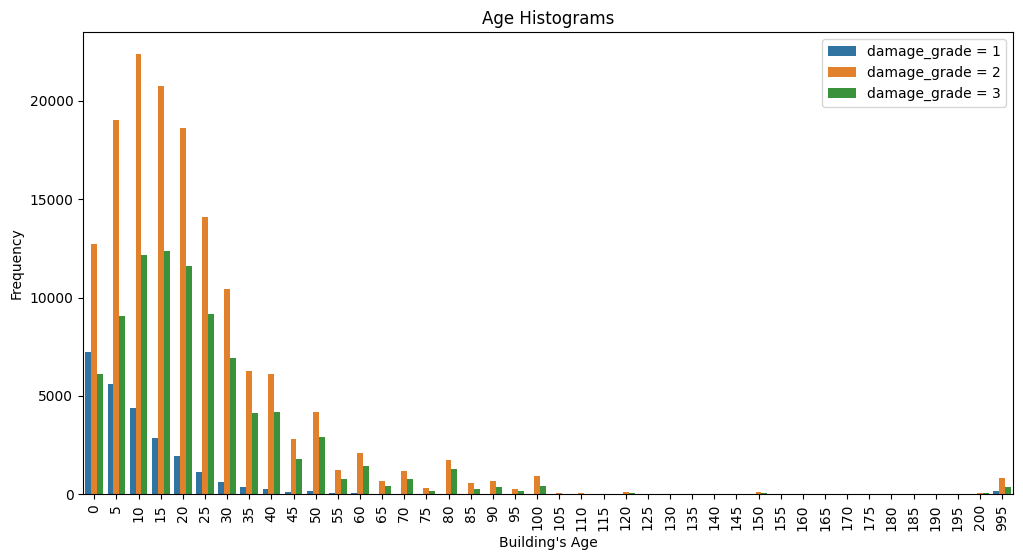

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x = df_train["age"], hue=df_train["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Building's Age")
plt.xticks(rotation=90)
plt.title("Age Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

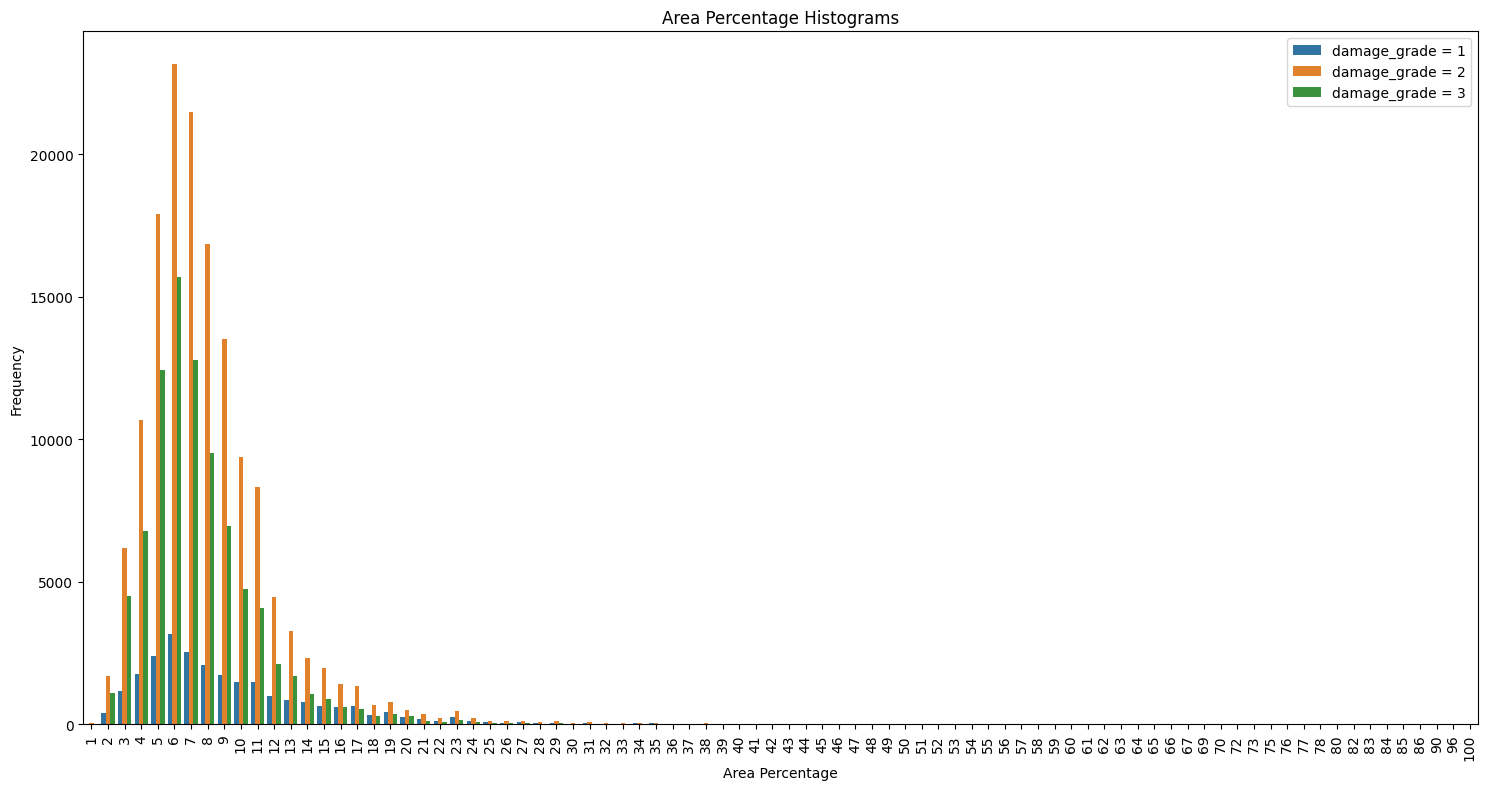

In [14]:
plt.figure(figsize=(18,9))
sns.countplot(x = df_train["area_percentage"], hue=df_train["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Area Percentage")
plt.xticks(rotation=90)
plt.title("Area Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

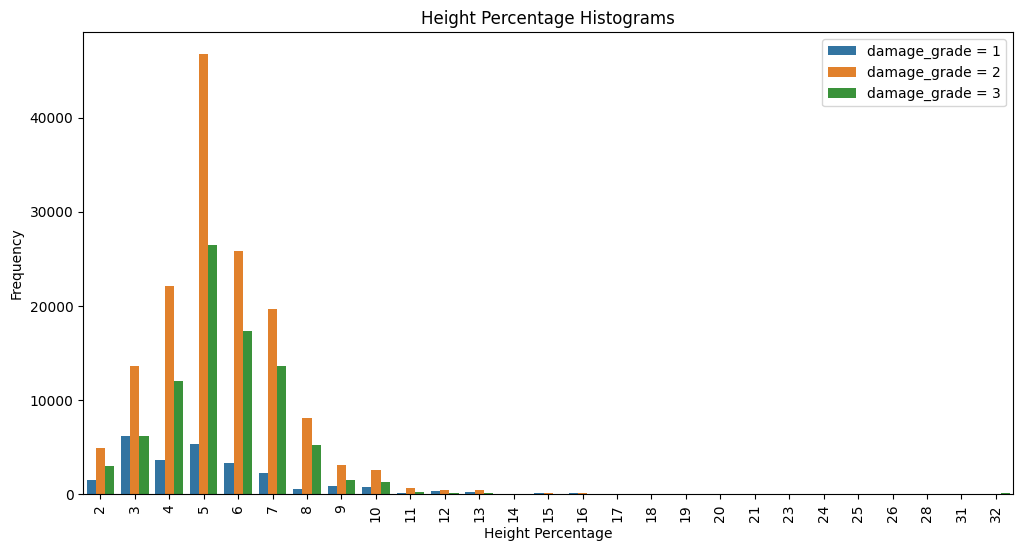

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x = df_train["height_percentage"], hue=df_train["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Height Percentage")
plt.xticks(rotation=90)
plt.title("Height Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

<Axes: ylabel='count_families'>

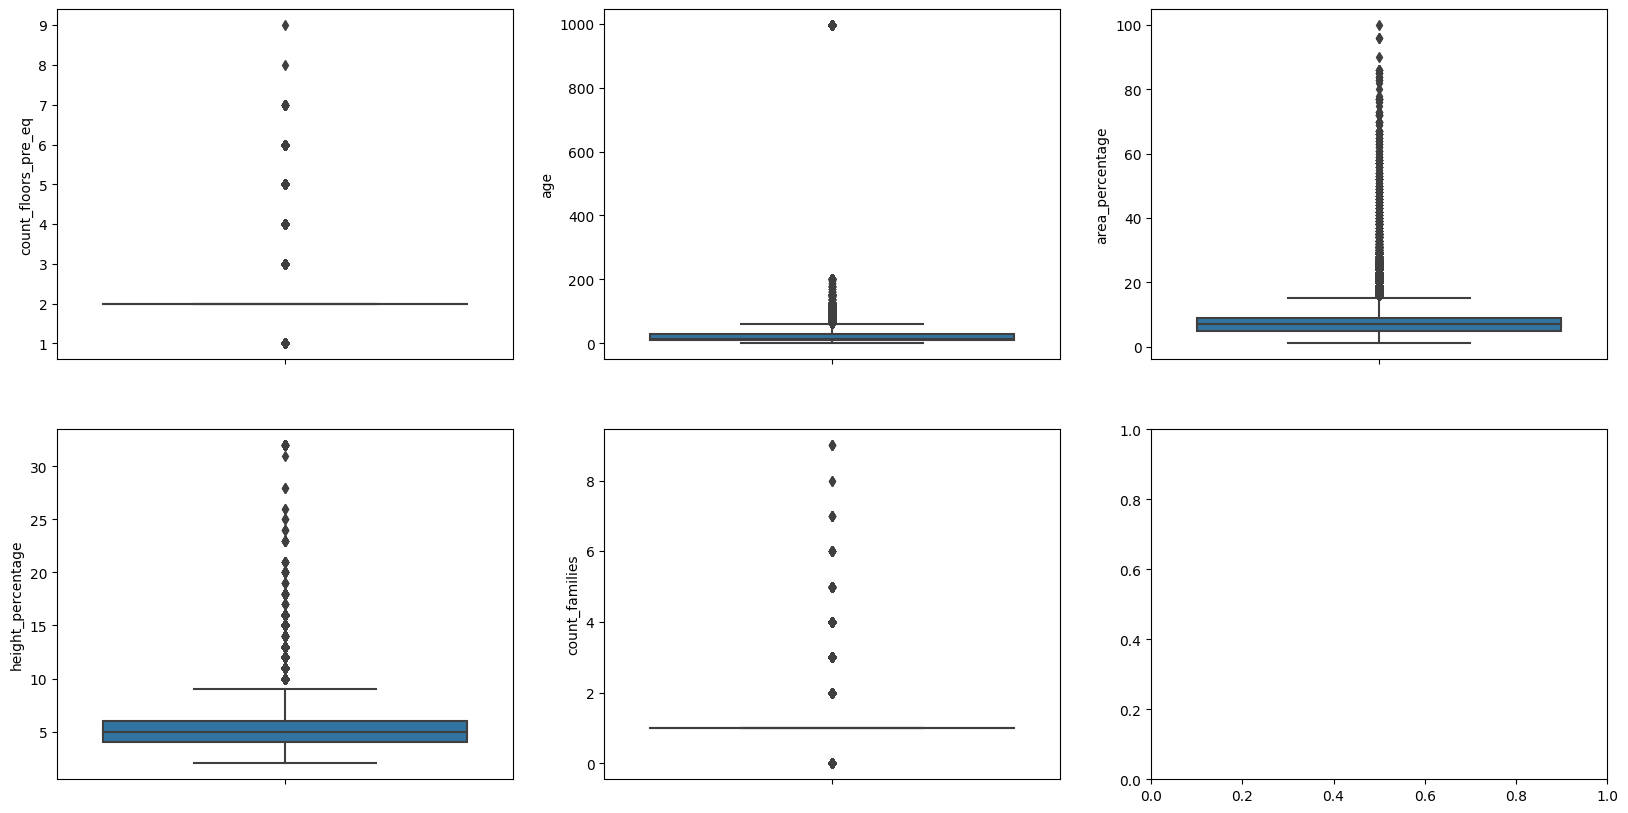

In [16]:
# Checking outliers
_,axss = plt.subplots(2,3, figsize=[20,10])  # create a 2x3 matrix = 6 figures
sns.boxplot(y ='count_floors_pre_eq', data=df_train, ax=axss[0, 0])
sns.boxplot(y ='age', data=df_train, ax=axss[0, 1]) ##!!!
sns.boxplot(y ='area_percentage', data=df_train, ax=axss[0, 2]) ##!!!
sns.boxplot(y ='height_percentage', data=df_train, ax=axss[1][0]) ##!!!
sns.boxplot(y ='count_families', data=df_train, ax=axss[1][1])

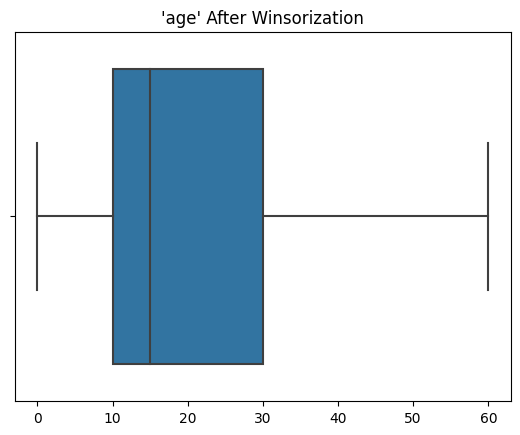

In [7]:
#Winsorization
winsorized_age = winsorize(df_train['age'],limits=(0, 0.05))
#After winsorization
sns.boxplot(x=winsorized_age)
plt.title("'age' After Winsorization")
plt.show()

#Replace data in dataset
df_train['age'] = winsorized_age

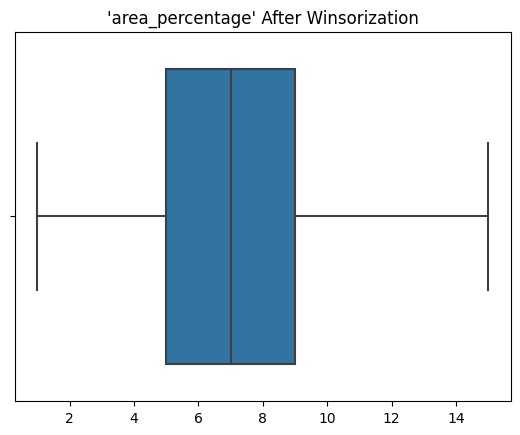

In [8]:
#Winsorization
winsorized_area = winsorize(df_train['area_percentage'],limits=(0, 0.053))

#After winsorization
sns.boxplot(x=winsorized_area)
plt.title("'area_percentage' After Winsorization")
plt.show()

#Replace data in dataset
df_train['area_percentage'] = winsorized_area


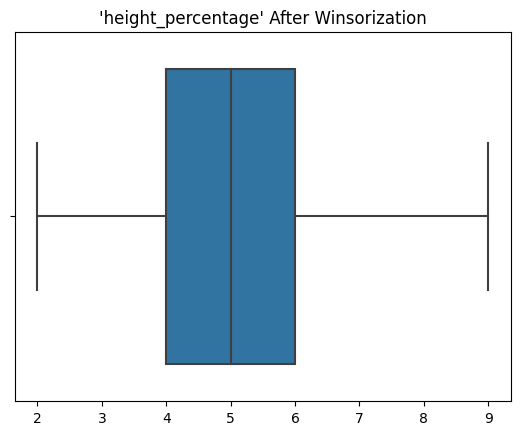

In [9]:
#Winsorization
winsorized_height = winsorize(df_train['height_percentage'],limits=(0, 0.04))

#After winsorization
sns.boxplot(x=winsorized_height)
plt.title("'height_percentage' After Winsorization")
plt.show()

#Replace data in dataset
df_train['height_percentage'] = winsorized_height

In [10]:
# Test set outliers
df3["age"] = winsorize(df3["age"],limits=(0, 0.05))
df3["area_percentage"] = winsorize(df3["area_percentage"],limits=(0, 0.053))
df3["height_percentage"] = winsorize(df3["height_percentage"],limits=(0, 0.04))
df_test = df3

## 3.4 Check class imbalance

<Axes: title={'center': 'Number of Buildings with Each Damage Grade'}>

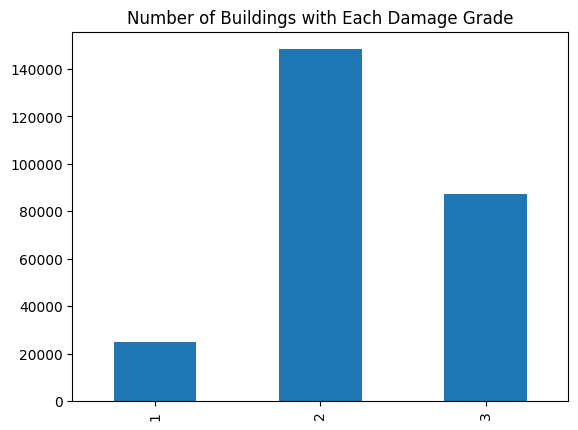

In [11]:
df_y.value_counts().sort_index().plot.bar(title='Number of Buildings with Each Damage Grade')

We can see that class imbalance exists.

# 4.Feature engineering

## 4.1 One-hot encoding

In [12]:
# One-hot encoding: convert category features to numerical features（0 & 1） - spliting into diff columns
columns_onehot = ['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type',
'position','plan_configuration','legal_ownership_status']

df_train_onehot = pd.get_dummies(df_train, 
                            columns = columns_onehot, 
                            drop_first = False)      # do not remove a lable to reduce multicollision 

df_test_onehot = pd.get_dummies(df_test,
              columns = columns_onehot,
              drop_first = False)

#df_train_onehot.head(2)
df_test_onehot.head(2)


geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
300051                   17             596           11307   
99355                     6             141           11987   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
300051                         3   20                7                  6   
99355                          2   25               13                  5   

             has_superstructure_adobe_mud  \
building_id                                 
300051                                  0   
99355                                   0   

             has_superstructure_mud_mortar_stone  \
building_id                                        
300051                                         1   
99355                                          1   

             has_superstructure_stone_flag  ...  plan_configuration_m  \
building_id                                 ...                         
300051                                   0  ...                     0   
99355                                    0  ...                     0   

             plan_configuration_n  plan_configuration_o  plan_configuration_q  \
building_id                                                                     
300051                          0                     0                     0   
99355                           0                     0                     0   

             plan_configuration_s  plan_configuration_u  \
building_id                                               
300051                          0                     0   
99355                           0                     0   

             legal_ownership_status_a  legal_ownership_status_r  \
building_id                                                       
300051                              0                         0   
99355                               0                         0   

             legal_ownership_status_v  legal_ownership_status_w  
building_id                                                      
300051                              1                         0  
99355                               1                         0  

[2 rows x 68 columns]

## 4.2 Correlation analysis and Drop features

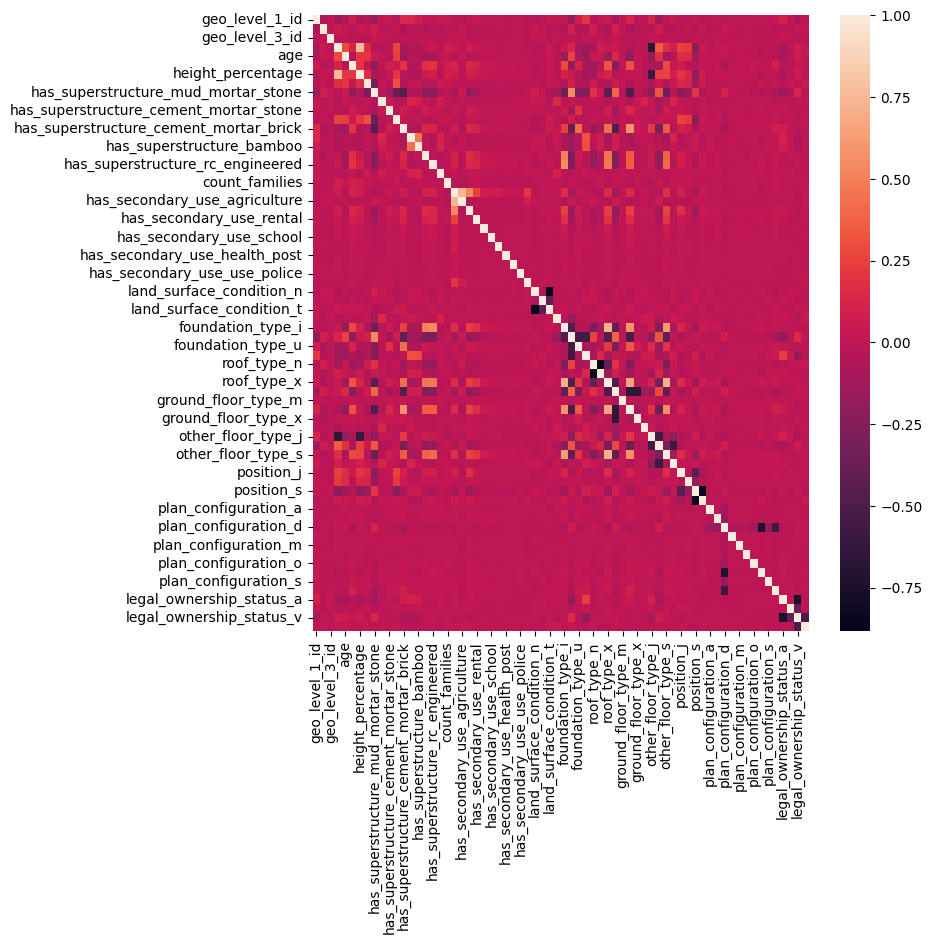

In [13]:
# Correlation matrix
y = df_train_onehot['damage_grade']
X = df_train_onehot.drop(['damage_grade'], axis=1)
corr_matrix = X.corr()

fig1, ax1 = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, ax=ax1)
plt.show()

In [14]:
# Find features that have a high correlation with at least one other feature in the dataset,
# with a correlation coefficient greater than 0.85
threshold = 0.85

relevant_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            relevant_features.append(corr_matrix.columns[i])
            break

print(relevant_features)

['land_surface_condition_n', 'roof_type_n']


In [15]:
# Drop those features
# training set
df_train_drop = df_train_onehot.drop(relevant_features, axis=1)

# test set
df_test_drop = df_test_onehot.drop(relevant_features, axis=1)

## 4.3 Standardization and PCA

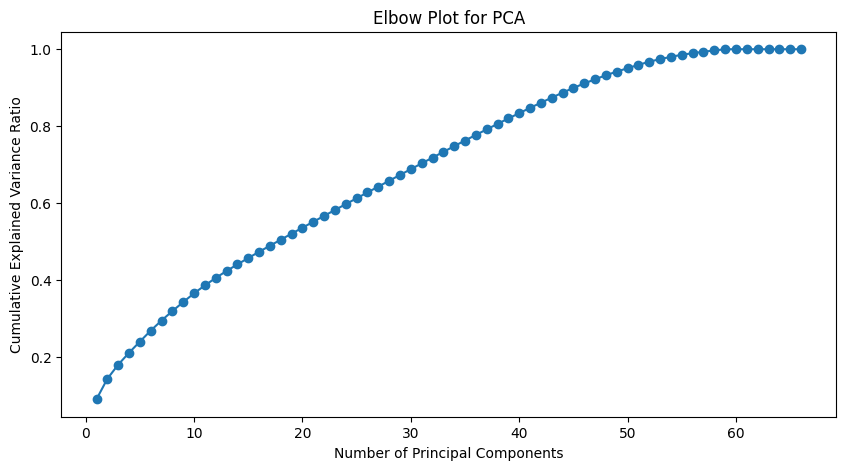

In [16]:
# standardize features
y = df_train_drop['damage_grade']
X = df_train_drop.drop(['damage_grade'], axis=1)

scaler1 = StandardScaler()
df_trainX_std = scaler1.fit_transform(X)
df_trainX_std = pd.DataFrame(df_trainX_std, columns=X.columns,index=X.index)
df_test_std = scaler1.transform(df_test_drop)
df_test_std = pd.DataFrame(df_test_std, columns=df_test_drop.columns,index=df_test_drop.index)

# PCA
pca1 = PCA(n_components = None)
df_train_pca = pca1.fit_transform(df_trainX_std)
df_test_pca = pca1.transform(df_test_std)
explained_variance = pca1.explained_variance_ratio_

cumulative_var_ratio = np.cumsum(pca1.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1,len(cumulative_var_ratio)+1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Elbow Plot for PCA')
plt.show()


###Each PC has similar variance. So, we don't use PCA.

# 5. Model selection

# 5.1 Train/test split

In [17]:
# train/test split(in training set)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 5.2 Random forest (NOT compensate for class imbalance)

In [29]:
model_rf1 = RandomForestClassifier(criterion="gini", 
                    max_features="sqrt", 
                    bootstrap=True, oob_score=True, 
                    random_state=1,
                    n_estimators=100, max_depth = 40,
                    min_samples_leaf=2)

model_rf1 = model_rf1.fit(X_train, y_train)

y_pred_rf1_train = model_rf1.predict(X_train)
y_pred_rf1_test = model_rf1.predict(X_test)
f1_train_rf1 = f1_score(y_train, y_pred_rf1_train, average='micro')
f1_test_rf1 = f1_score(y_test, y_pred_rf1_test, average='micro')
print('micro f1 for training data:',f1_train_rf1)
print('------------------------------------------------------------') 
print('micro f1 for validation data:',f1_test_rf1)

# 0.7227796857312792

micro f1 for training data: 0.839025326170376
------------------------------------------------------------
micro f1 for validation data: 0.7227796857312792


In [30]:
# feature importances
feature_importances = list(zip(X_train.columns, model_rf1.feature_importances_))
df_importance = pd.DataFrame(feature_importances, columns = ["Feature", "Importance"])
df_importance_sorted = df_importance.sort_values('Importance', ascending=False)
df_importance_sorted

Feature  Importance
0                 geo_level_1_id    0.202319
1                 geo_level_2_id    0.131026
2                 geo_level_3_id    0.119372
4                            age    0.075161
5                area_percentage    0.070805
..                           ...         ...
56          plan_configuration_m    0.000008
27  has_secondary_use_gov_office    0.000007
57          plan_configuration_n    0.000003
55          plan_configuration_f    0.000003
28  has_secondary_use_use_police    0.000002

[66 rows x 2 columns]

## 5.3 Random forest (class imbalance is addressed)

In [30]:
# Set class_weight="balanced_subsample"

model_rf2 = RandomForestClassifier(criterion="gini", 
                    max_features="sqrt", 
                    bootstrap=True, oob_score=True, 
                    random_state=1, class_weight="balanced_subsample",
                    n_estimators=100, max_depth = 30,
                    min_samples_leaf=1       
                    )
model_rf2 = model_rf2.fit(X_train, y_train)


y_pred2_train = model_rf2.predict(X_train)
y_pred2_test = model_rf2.predict(X_test)
f1_train_rf2 = f1_score(y_train, y_pred2_train, average='micro')
f1_test_rf2 = f1_score(y_test, y_pred2_test, average='micro')
print('micro f1 for training data:',f1_train_rf2)
print('------------------------------------------------------------') 
print('micro f1 for validation data:',f1_test_rf2)

# 0.7107307994858119

micro f1 for training data: 0.9349673829623945
------------------------------------------------------------
micro f1 for validation data: 0.7107307994858119


## 5.4 XGBoost(L1-penalized)


In [28]:
# need to change y from 1,2,3 to 0,1,2
y_train_new = y_train - 1
y_test_new = y_test - 1

xgb_try = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=5000,
                    learning_rate=0.01,
                    max_depth=10, 
                    reg_alpha=0.003,
                    subsample=0.8,
                    colsample_bytree=0.5,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )
xgb_try = xgb_try.fit(X_train, y_train_new)

y_pred_xgb_train = xgb_try.predict(X_train)
y_pred_xgb_test = xgb_try.predict(X_test)
f1_train_xgb = f1_score(y_train_new, y_pred_xgb_train, average='micro')
f1_test_xgb = f1_score(y_test_new, y_pred_xgb_test, average='micro')
print('micro f1 for training data:',f1_train_xgb)
print('------------------------------------------------------------') 
print('micro f1 for validation data:',f1_test_xgb)

# 0.7513670113773718

micro f1 for training data: 0.8557079815809671
------------------------------------------------------------
micro f1 for validation data: 0.7513670113773718


In [29]:
# feature importances
feature_importances_xgb = list(zip(X_train.columns, xgb_try.feature_importances_))
df_importance_xgb = pd.DataFrame(feature_importances_xgb, columns = ["Feature", "Importance"])
df_importance_sorted_xgb = df_importance_xgb.sort_values('Importance', ascending=False)
df_importance_sorted_xgb

Feature  Importance
34                    foundation_type_r    0.090083
41                  ground_floor_type_v    0.065512
0                        geo_level_1_id    0.058728
8   has_superstructure_mud_mortar_stone    0.039451
33                    foundation_type_i    0.030423
..                                  ...         ...
58                 plan_configuration_o    0.006940
26        has_secondary_use_health_post    0.005614
27         has_secondary_use_gov_office    0.005189
55                 plan_configuration_f    0.005039
28         has_secondary_use_use_police    0.004613

[66 rows x 2 columns]

## 5.5 SVM(Gaussian kernel)+one versus all classifier

In [33]:
# Sample 10% of the data
unique_labels1, label_counts1 = np.unique(y_train, return_counts=True)

label_counts_df1 = pd.DataFrame({'label': unique_labels1, 'count': label_counts1})

print(label_counts_df1)

rus1 = RandomUnderSampler(sampling_strategy={1: 7000, 2: 7000, 3: 7000}, random_state=42) #sample 20%

X_resampled1, y_resampled1 = rus1.fit_resample(X_train, y_train)


   label   count
0      1   20099
1      2  118607
2      3   69774


In [ ]:
parameters_svc_rbf = {'estimator__C':np.logspace(-1, 2, 4),'estimator__gamma':[0.1]}
svc0 = OneVsRestClassifier(SVC(kernel='rbf'), n_jobs=3)

clf_svc_rbf = GridSearchCV(svc0,parameters_svc_rbf,cv=5,scoring='f1_micro').fit(X_resampled1,y_resampled1)
svc_rbf_chosen= clf_svc_rbf.best_estimator_
print('best parameters:',clf_svc_rbf.best_params_)
print('best cv score:',clf_svc_rbf.best_score_)
# 0.5214761904761904

In [ ]:
# The training process is too slow, so we use a small dataset to train it to see how it performs.
svc_best = OneVsRestClassifier(SVC(kernel='rbf',C=1,gamma=0.1))

svc_best = svc_best.fit(X_resampled1,y_resampled1)

y_pred_svc_train_sample = svc_best.predict(X_resampled1)
y_pred_svc_test = svc_best.predict(X_test)
f1_train_svc = f1_score(y_resampled1, y_pred_svc_train_sample, average='micro')
f1_test_svc = f1_score(y_test, y_pred_svc_test, average='micro')
print('micro f1 for training data:',f1_train_svc)
print('------------------------------------------------------------') 
print('micro f1 for test data:',f1_test_svc)

## 5.6 SVM(linear kernel)(L1-penalized)

In [34]:

parameters_svc_linear = {'C':np.logspace(-3, 3, 7)}
svc_linear0 = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, multi_class='ovr', max_iter=5000)
clf_svc_linear = GridSearchCV(svc_linear0, parameters_svc_linear, cv=5, scoring='f1_micro').fit(X_resampled1,y_resampled1)
svc_linear_chosen = clf_svc_linear.best_estimator_
print('best parameters:',clf_svc_linear.best_params_)
print('best cv score:',clf_svc_linear.best_score_)
#0.5706666666666667


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


best parameters: {'C': 0.1}
best cv score: 0.5709047619047618


In [35]:
svc_linear_best = LinearSVC(C=0.1,
                            penalty='l1', loss='squared_hinge', dual=False, multi_class='ovr', max_iter=5000)


svc_linear_best = svc_linear_best.fit(X_train,y_train)

y_pred_svcl_train = svc_linear_best.predict(X_train)
y_pred_svcl_test = svc_linear_best.predict(X_test)
f1_train_svcl = f1_score(y_train, y_pred_svcl_train, average='micro')
f1_test_svcl = f1_score(y_test, y_pred_svcl_test, average='micro')
print('micro f1 for training data:',f1_train_svcl)
print('------------------------------------------------------------') 
print('micro f1 for test data:',f1_test_svcl)
# 0.5910477542641162

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


micro f1 for training data: 0.5905506523407521
------------------------------------------------------------
micro f1 for test data: 0.5910477542641162


## 5.7 Multinomial logistic regression(L1-penalized)

In [36]:

model_lr = LogisticRegressionCV(cv=5, penalty='l1',scoring='f1_micro', 
                     solver='saga',max_iter=5000,n_jobs=-1,multi_class='multinomial',
                    random_state=0).fit(X_train,y_train)
y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)
f1_train_lr = f1_score(y_train, y_pred_train_lr, average='micro')
f1_test_lr = f1_score(y_test, y_pred_test_lr, average='micro')
print('micro f1 for training data:',f1_train_lr)
print('------------------------------------------------------------') 
print('micro f1 for test data:',f1_test_lr)
# 0.5758907158343086

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


micro f1 for training data: 0.5754221028396009
------------------------------------------------------------
micro f1 for test data: 0.5758907158343086


# 6. Final model 

## 6.1 Parameter tuning
we choose XGBoost(L1-penalized)


### 6.1.1 Use raw features

In [18]:
# need change y from 1,2,3 to 0,1,2
y_train_new = y_train - 1
y_test_new = y_test - 1

# Sample 20% of the data
unique_labels2, label_counts2 = np.unique(y_train_new, return_counts=True)

label_counts_df2 = pd.DataFrame({'label': unique_labels2, 'count': label_counts2})

print(label_counts_df2)

rus2 = RandomUnderSampler(sampling_strategy={0: 14000, 1: 14000, 2: 14000}, random_state=42)

X_resampled2, y_resampled2 = rus2.fit_resample(X_train, y_train_new)

   label   count
0      0   20099
1      1  118607
2      2   69774


In [ ]:
# use sample2 to do GridSearch
# Because the number of features is large, we use L1-penalized

xgb00 = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=2000,
                    subsample=0.8,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )

parameters_xgb00 = {
              'learning_rate':[0.01,0.05,0.1],
              'max_depth':[10,20,30],
              'reg_alpha':[0.001,0.003,0.005],
              'colsample_bytree':[0.3,0.5,0.7]} 

clf_xgb00 = GridSearchCV(xgb00,parameters_xgb00,cv=5,scoring='f1_micro').fit(X_resampled2,y_resampled2)

print('best parameters:',clf_xgb00.best_params_)
print('best cv score:',clf_xgb00.best_score_)


In [ ]:
 # use all training data to do GridSearch

xgb0 = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=5000,
                    subsample=0.8,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )

parameters_xgb0 = {
              'learning_rate':[0.01], 
              'max_depth':[10],
              'reg_alpha':[0.002,0.004,0.006],
              'colsample_bytree':[0.3,0.4,0.6]} 

clf_xgb0 = GridSearchCV(xgb0,parameters_xgb0,cv=5,scoring='f1_micro').fit(X_train, y_train_new)

print('best parameters:',clf_xgb0.best_params_)
print('best cv score:',clf_xgb0.best_score_)

#0.7427954719877206

In [33]:
# best!!
# use the best parameters to refit and perform EarlyStop to find the best iteration times
xgb_raw = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=7000,
                    learning_rate=0.01,
                    max_depth=10, 
                    reg_alpha=0.004,
                    subsample=0.8,
                    colsample_bytree=0.6,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )

validation_0 = [(X_test,y_test_new)]
es_raw = xgboost.callback.EarlyStopping(
    rounds=200,
    metric_name='mlogloss',
    maximize=False,
    save_best=True,
    data_name="validation_0")

xgb_raw = xgb_raw.fit(X_train, y_train_new, eval_set=[(X_test,y_test_new)], callbacks=[es_raw])
#0.56249

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.09405
[1]	validation_0-mlogloss:1.08965
[2]	validation_0-mlogloss:1.08589
[3]	validation_0-mlogloss:1.08067
[4]	validation_0-mlogloss:1.07625
[5]	validation_0-mlogloss:1.07122
[6]	validation_0-mlogloss:1.06638
[7]	validation_0-mlogloss:1.06232
[8]	validation_0-mlogloss:1.05818
[9]	validation_0-mlogloss:1.05395
[10]	validation_0-mlogloss:1.04922
[11]	validation_0-mlogloss:1.04497
[12]	validation_0-mlogloss:1.04119
[13]	validation_0-mlogloss:1.03724
[14]	validation_0-mlogloss:1.03402
[15]	validation_0-mlogloss:1.03074
[16]	validation_0-mlogloss:1.02637
[17]	validation_0-mlogloss:1.02333
[18]	validation_0-mlogloss:1.01969
[19]	validation_0-mlogloss:1.01536
[20]	validation_0-mlogloss:1.01109
[21]	validation_0-mlogloss:1.00689
[22]	validation_0-mlogloss:1.00383
[23]	validation_0-mlogloss:0.99978
[24]	validation_0-mlogloss:0.99631
[25]	validation_0-mlogloss:0.99241
[26]	validation_0-mlogloss:0.98836
[27]	validation_0-mlogloss:0.98523
[28]	validation_0-mlogloss:0.9

In [34]:
best_iteration_raw = xgb_raw.best_iteration
best_ntree_limit_raw = xgb_raw.best_ntree_limit

xgb_best_raw = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=best_ntree_limit_raw,
                    learning_rate=0.01,
                    max_depth=10, 
                    reg_alpha=0.004,
                    subsample=0.8,
                    colsample_bytree=0.6,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )
xgb_best_raw = xgb_best_raw.fit(X_train, y_train_new)

y_pred_xgbr_train = xgb_best_raw.predict(X_train)
y_pred_xgbr_test = xgb_best_raw.predict(X_test)
f1_train_xgbr = f1_score(y_train_new, y_pred_xgbr_train, average='micro')
f1_test_xgbr = f1_score(y_test_new, y_pred_xgbr_test, average='micro')
print('micro f1 for training data:',f1_train_xgbr)
print('------------------------------------------------------------') 
print('micro f1 for validation data:',f1_test_xgbr)

#0.7517699199938604

micro f1 for training data: 0.8566241366078281
------------------------------------------------------------
micro f1 for validation data: 0.7517699199938604


In [41]:
print('Classification report for training data:')
print(classification_report(y_train_new, y_pred_xgbr_train))
print('------------------------------------------------------------') 
print('Classification report for validation data:')
print(classification_report(y_test_new, y_pred_xgbr_test))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     20099
           1       0.84      0.92      0.88    118607
           2       0.87      0.76      0.81     69774

    accuracy                           0.86    208480
   macro avg       0.88      0.82      0.85    208480
weighted avg       0.86      0.86      0.85    208480

------------------------------------------------------------
Classification report for validation data:
              precision    recall  f1-score   support

           0       0.69      0.54      0.61      5025
           1       0.75      0.85      0.80     29652
           2       0.77      0.65      0.70     17444

    accuracy                           0.75     52121
   macro avg       0.74      0.68      0.70     52121
weighted avg       0.75      0.75      0.75     52121



In [35]:
# feature importances
xgbfeature_importances = list(zip(X_train.columns, xgb_best_raw.feature_importances_))
xgb_importance = pd.DataFrame(xgbfeature_importances, columns = ["Feature", "Importance"])
xgb_importance_sorted = xgb_importance.sort_values('Importance', ascending=False)
xgb_importance_sorted

Feature  Importance
34                    foundation_type_r    0.104527
41                  ground_floor_type_v    0.071647
0                        geo_level_1_id    0.055329
8   has_superstructure_mud_mortar_stone    0.037526
33                    foundation_type_i    0.032289
..                                  ...         ...
58                 plan_configuration_o    0.006818
26        has_secondary_use_health_post    0.005493
27         has_secondary_use_gov_office    0.004979
55                 plan_configuration_f    0.004969
28         has_secondary_use_use_police    0.004472

[66 rows x 2 columns]

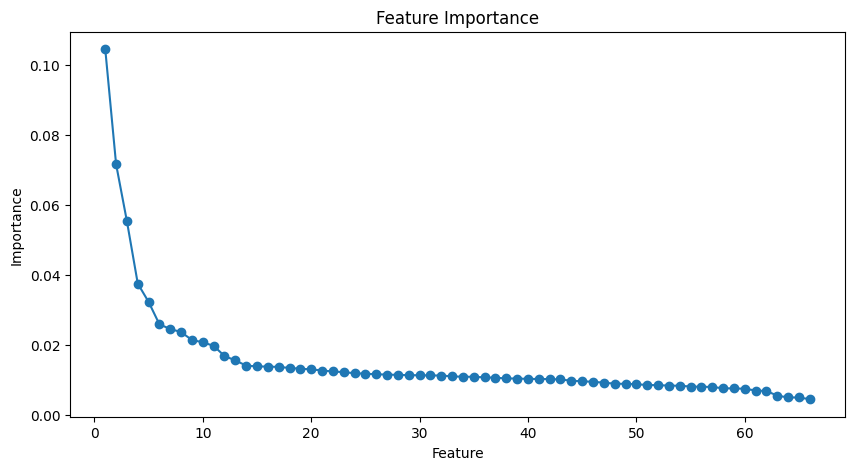

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(range(1,len(xgb_importance_sorted)+1), xgb_importance_sorted['Importance'], marker='o')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### 10.1.2 Use standardized features

In [37]:
# standardize features
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns,index=X_train.index)
X_test_std = scaler_std.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns,index=X_test.index)

In [38]:
# Sample 10% of the standardized data

rus3 = RandomUnderSampler(sampling_strategy={0: 7000, 1: 7000, 2: 7000}, random_state=42)

X_resampled2_std, y_resampled2_std = rus3.fit_resample(X_train_std, y_train_new)

In [ ]:
# use sample2 to do GridSearch

xgb01 = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=2000,
                    subsample=0.8,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )

parameters_xgb01 = {
              'learning_rate':[0.01],
              'max_depth':[10],
              'reg_alpha':[0.002,0.004,0.006],
              'colsample_bytree':[0.3,0.4,0.6]} 


clf_xgb01 = GridSearchCV(xgb01,parameters_xgb01,cv=5,scoring='f1_micro').fit(X_resampled2_std,y_resampled2_std)

print('best parameters:',clf_xgb01.best_params_)
print('best cv score:',clf_xgb01.best_score_)
#0.7

In [39]:
# use the best parameters to refit and perform EarlyStop to find the best iteration times
# use standardized features

xgb_std = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=7000,
                    learning_rate=0.01,
                    max_depth=10, reg_alpha=0.002,
                    subsample=0.8,
                    colsample_bytree=0.3,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )

validation_0 = [(X_test_std,y_test_new)]

es_std = xgboost.callback.EarlyStopping(
    rounds=200,
    metric_name='mlogloss',
    maximize=False,
    save_best=True,
    data_name="validation_0")

xgb_std = xgb_std.fit(X_train_std, y_train_new, eval_set=[(X_test_std,y_test_new)], callbacks=[es_std])


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[2000]	validation_0-mlogloss:0.58632
[2001]	validation_0-mlogloss:0.58631
[2002]	validation_0-mlogloss:0.58629
[2003]	validation_0-mlogloss:0.58628
[2004]	validation_0-mlogloss:0.58625
[2005]	validation_0-mlogloss:0.58624
[2006]	validation_0-mlogloss:0.58623
[2007]	validation_0-mlogloss:0.58623
[2008]	validation_0-mlogloss:0.58623
[2009]	validation_0-mlogloss:0.58621
[2010]	validation_0-mlogloss:0.58621
[2011]	validation_0-mlogloss:0.58617
[2012]	validation_0-mlogloss:0.58616
[2013]	validation_0-mlogloss:0.58615
[2014]	validation_0-mlogloss:0.58614
[2015]	validation_0-mlogloss:0.58613
[2016]	validation_0-mlogloss:0.58613
[2017]	validation_0-mlogloss:0.58612
[2018]	validation_0-mlogloss:0.58609
[2019]	validation_0-mlogloss:0.58609
[2020]	validation_0-mlogloss:0.58608
[2021]	validation_0-mlogloss:0.58608
[2022]	validation_0-mlogloss:0.58606
[2023]	validation_0-mlogloss:0.58606
[2024]	validation_0-mlogloss:0.58606
[2025]	validation_0-mlog

In [40]:
best_iteration_std = xgb_std.best_iteration
best_ntree_limit_std = xgb_std.best_ntree_limit

xgb_best_std = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=best_ntree_limit_std,
                    learning_rate=0.01,
                    max_depth=10, reg_alpha=0.002,
                    subsample=0.8,
                    colsample_bytree=0.3,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )

xgb_best_std = xgb_best_std.fit(X_train_std, y_train_new)

y_pred_xgbs_train = xgb_best_std.predict(X_train_std)
y_pred_xgbs_test = xgb_best_std.predict(X_test_std)
f1_train_xgbs = f1_score(y_train_new, y_pred_xgbs_train, average='micro')
f1_test_xgbs = f1_score(y_test_new, y_pred_xgbs_test, average='micro')
print('micro f1 for training data:',f1_train_xgbs)
print('------------------------------------------------------------') 
print('micro f1 for validation data:',f1_test_xgbs)
# 0.7507146831411522

micro f1 for training data: 0.8433518802762856
------------------------------------------------------------
micro f1 for validation data: 0.7507146831411522


### 10.1.3 Use normalized features

In [42]:
# normalize features
scaler_mm = MinMaxScaler()
X_train_norm = scaler_mm.fit_transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns,index=X_train.index)
X_test_norm = scaler_mm.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns,index=X_test.index)


In [43]:
# Sample 10% of the normalized data

rus4 = RandomUnderSampler(sampling_strategy={0: 7000, 1: 7000, 2: 7000}, random_state=42)

X_resampled2_norm, y_resampled2_norm = rus4.fit_resample(X_train_norm, y_train_new)

In [ ]:
# use sample2 to do GridSearch

xgb02 = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=2000,
                    subsample=0.8,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )

parameters_xgb02 = {
              'learning_rate':[0.01], 
              'max_depth':[10],
              'reg_alpha':[0.002,0.004,0.006],
              'colsample_bytree':[0.3,0.4,0.6]} 

clf_xgb02 = GridSearchCV(xgb02,parameters_xgb02,cv=5,scoring='f1_micro').fit(X_resampled2_norm,y_resampled2_norm)

print('best parameters:',clf_xgb02.best_params_)
print('best cv score:',clf_xgb02.best_score_)


In [44]:
# use the best parameters to refit and perform EarlyStop to find the best iteration times
# use normalized features

xgb_norm = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=7000,
                    learning_rate=0.01,
                    max_depth=10, reg_alpha=0.002,
                    subsample=0.8,
                    colsample_bytree=0.3,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )

validation_0 = [(X_test_norm,y_test_new)]

es_norm = xgboost.callback.EarlyStopping(
    rounds=200,
    metric_name='mlogloss',
    maximize=False,
    save_best=True,
    data_name="validation_0")

xgb_norm = xgb_norm.fit(X_train_norm, y_train_new, eval_set=[(X_test_norm,y_test_new)], callbacks=[es_norm])
#0.56249

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[2001]	validation_0-mlogloss:0.58631
[2002]	validation_0-mlogloss:0.58629
[2003]	validation_0-mlogloss:0.58628
[2004]	validation_0-mlogloss:0.58625
[2005]	validation_0-mlogloss:0.58624
[2006]	validation_0-mlogloss:0.58623
[2007]	validation_0-mlogloss:0.58623
[2008]	validation_0-mlogloss:0.58623
[2009]	validation_0-mlogloss:0.58621
[2010]	validation_0-mlogloss:0.58621
[2011]	validation_0-mlogloss:0.58617
[2012]	validation_0-mlogloss:0.58616
[2013]	validation_0-mlogloss:0.58615
[2014]	validation_0-mlogloss:0.58614
[2015]	validation_0-mlogloss:0.58613
[2016]	validation_0-mlogloss:0.58613
[2017]	validation_0-mlogloss:0.58612
[2018]	validation_0-mlogloss:0.58609
[2019]	validation_0-mlogloss:0.58609
[2020]	validation_0-mlogloss:0.58608
[2021]	validation_0-mlogloss:0.58608
[2022]	validation_0-mlogloss:0.58606
[2023]	validation_0-mlogloss:0.58606
[2024]	validation_0-mlogloss:0.58606
[2025]	validation_0-mlogloss:0.58606
[2026]	validation_0-mlog

In [45]:
best_iteration_norm = xgb_norm.best_iteration
best_ntree_limit_norm = xgb_norm.best_ntree_limit

xgb_best_norm = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=best_ntree_limit_norm,
                    learning_rate=0.01,
                    max_depth=10, reg_alpha=0.002,
                    subsample=0.8,
                    colsample_bytree=0.3,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )
xgb_best_norm = xgb_best_norm.fit(X_train_norm, y_train_new)

y_pred_xgbn_train = xgb_best_norm.predict(X_train_norm)
y_pred_xgbn_test = xgb_best_norm.predict(X_test_norm)
f1_train_xgbn = f1_score(y_train_new, y_pred_xgbn_train, average='micro')
f1_test_xgbn = f1_score(y_test_new, y_pred_xgbn_test, average='micro')
print('micro f1 for training data:',f1_train_xgbn)
print('------------------------------------------------------------') 
print('micro f1 for validation data:',f1_test_xgbn)
#0.7507146831411522

micro f1 for training data: 0.8433518802762856
------------------------------------------------------------
micro f1 for validation data: 0.7507146831411522


### 10.1.4 Use SMOTE to pre-process data to compensate for class imbalance(on raw features)

In [19]:
"""
label   count
0        20099
1        118607
2        69774
"""
smo1 = SMOTE(sampling_strategy={0:37676,1:118607,2:69774}, random_state=1) #label0=(label1+label2)/5 
X_train_smo1,y_train_new_smo1 =smo1.fit_resample(pd.DataFrame(X_train), list(y_train_new))


In [20]:
# Sample 10% of the data after SMOTE

rus5 = RandomUnderSampler(sampling_strategy={0: 7000, 1: 7000, 2: 7000}, random_state=42)

X_resampled2_smo, y_resampled2_smo = rus5.fit_resample(X_train_smo1, y_train_new_smo1)

In [ ]:
# use sample2 to do GridSearch

xgb03 = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=2000,
                    subsample=0.8,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )

parameters_xgb03 = {
              'learning_rate':[0.01], 
              'max_depth':[10],
              'reg_alpha':[0.002,0.004,0.006],
              'colsample_bytree':[0.3,0.4,0.6]} 

clf_xgb03 = GridSearchCV(xgb03,parameters_xgb03,cv=5,scoring='f1_micro').fit(X_resampled2_smo,y_resampled2_smo)

print('best parameters:',clf_xgb03.best_params_)
print('best cv score:',clf_xgb03.best_score_)


In [21]:
# use the best parameters to refit and perform EarlyStop to find the best iteration times
# use data after SMOTE

xgb_smo = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=7000,
                    learning_rate=0.01,
                    max_depth=10, reg_alpha=0.004,
                    subsample=0.8,
                    colsample_bytree=0.3,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )
validation_0 = [(X_test,y_test_new)]

es_smo = xgboost.callback.EarlyStopping(
    rounds=200,
    metric_name='mlogloss',
    maximize=False,
    save_best=True,
    data_name="validation_0")

xgb_smo = xgb_smo.fit(X_train_smo1, y_train_new_smo1, eval_set=[(X_test,y_test_new)], callbacks=[es_smo])
#0.56249

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[2000]	validation_0-mlogloss:0.59116
[2001]	validation_0-mlogloss:0.59114
[2002]	validation_0-mlogloss:0.59114
[2003]	validation_0-mlogloss:0.59112
[2004]	validation_0-mlogloss:0.59110
[2005]	validation_0-mlogloss:0.59109
[2006]	validation_0-mlogloss:0.59108
[2007]	validation_0-mlogloss:0.59107
[2008]	validation_0-mlogloss:0.59107
[2009]	validation_0-mlogloss:0.59106
[2010]	validation_0-mlogloss:0.59105
[2011]	validation_0-mlogloss:0.59100
[2012]	validation_0-mlogloss:0.59099
[2013]	validation_0-mlogloss:0.59098
[2014]	validation_0-mlogloss:0.59097
[2015]	validation_0-mlogloss:0.59097
[2016]	validation_0-mlogloss:0.59096
[2017]	validation_0-mlogloss:0.59094
[2018]	validation_0-mlogloss:0.59092
[2019]	validation_0-mlogloss:0.59091
[2020]	validation_0-mlogloss:0.59091
[2021]	validation_0-mlogloss:0.59090
[2022]	validation_0-mlogloss:0.59089
[2023]	validation_0-mlogloss:0.59089
[2024]	validation_0-mlogloss:0.59088
[2025]	validation_0-mlog

In [22]:
best_iteration_smo = xgb_smo.best_iteration
best_ntree_limit_smo = xgb_smo.best_ntree_limit

xgb_best_smo = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=best_ntree_limit_smo,
                    learning_rate=0.01,
                    max_depth=10, reg_alpha=0.004,
                    subsample=0.8,
                    colsample_bytree=0.6,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )
xgb_best_smo = xgb_best_smo.fit(X_train_smo1, y_train_new_smo1)

y_pred_xgbsmo_train = xgb_best_smo.predict(X_train_smo1)
y_pred_xgbsmo_test = xgb_best_smo.predict(X_test)
f1_train_xgbsmo = f1_score(y_train_new_smo1, y_pred_xgbsmo_train, average='micro')
f1_test_xgbsmo = f1_score(y_test_new, y_pred_xgbsmo_test, average='micro')
print('micro f1 for training data:',f1_train_xgbsmo)
print('------------------------------------------------------------') 
print('micro f1 for validation data:',f1_test_xgbsmo)
# 0.7489879319276299

micro f1 for training data: 0.893287976041441
------------------------------------------------------------
micro f1 for validation data: 0.7489879319276299


In [23]:
print('Classification report for training data:')
print(classification_report(y_train_new_smo1, y_pred_xgbsmo_train))
print('------------------------------------------------------------') 
print('Classification report for validation data:')
print(classification_report(y_test_new, y_pred_xgbsmo_test))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     37676
           1       0.87      0.94      0.90    118607
           2       0.90      0.81      0.85     69774

    accuracy                           0.89    226057
   macro avg       0.91      0.89      0.90    226057
weighted avg       0.89      0.89      0.89    226057

------------------------------------------------------------
Classification report for validation data:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61      5025
           1       0.75      0.84      0.79     29652
           2       0.76      0.65      0.70     17444

    accuracy                           0.75     52121
   macro avg       0.73      0.68      0.70     52121
weighted avg       0.75      0.75      0.75     52121



## 10.2 Final model training

In [26]:
# prepare for final model training 
y_new = y-1

# SMOTE
smote1 = SMOTE(sampling_strategy={0:47095,1:148259,2:87218}, random_state=1)      #label0=(label1+label2)/5  
X_smote,y_new_smote =smote1.fit_resample(X, y_new)


In [27]:
unique_labels, label_counts = np.unique(y_new, return_counts=True)

label_counts_dff = pd.DataFrame({'label': unique_labels, 'count': label_counts})

print(label_counts_dff)

   label   count
0      0   25124
1      1  148259
2      2   87218


In [28]:
submission_format = pd.read_csv('/content/drive/MyDrive/CSCI567/submission_format.csv', index_col='building_id')

### 10.2.1 XGBOOST + raw features

In [30]:

xgb_final1 = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=7000,
                    learning_rate=0.01,
                    max_depth=10, reg_alpha=0.004,#0.002
                    subsample=0.8,
                    colsample_bytree=0.6,#0.4
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )

xgb_final1 = xgb_final1.fit(X, y_new)



y_pred_xgb_train_final1 = xgb_final1.predict(X)
f1_train_xgb_final1 = f1_score(y_new, y_pred_xgb_train_final1, average='micro')
print('micro f1 for training set:',f1_train_xgb_final1)

# test set predict
y_pred_xgb_test_final1 = xgb_final1.predict(df_test_drop)

result_test_y1 = y_pred_xgb_test_final1 + 1


my_submission1 = pd.DataFrame(data=result_test_y1,
                             columns=submission_format.columns,
                             index=submission_format.index)

my_submission1.to_csv('submission1(raw).csv')
# 0.7502

micro f1 for training set: 0.875146296445524


### 10.2.2 XGBOOST + SMOTE

In [32]:

xgb_final2 = XGBClassifier(booster='gbtree',
                         objective='multi:softmax',
                         num_class=3,
                    n_estimators=7000,
                    learning_rate=0.01,
                    max_depth=10, reg_alpha=0.004,
                    subsample=0.8,
                    colsample_bytree=0.3,
                    tree_method='gpu_hist',
                    eval_metric='mlogloss'
                    )
xgb_final2 = xgb_final2.fit(X_smote,y_new_smote)

y_pred_xgb_train_final2 = xgb_final2.predict(X_smote)
f1_train_xgb_final2 = f1_score(y_new_smote, y_pred_xgb_train_final2, average='micro')
print('micro f1 for training set:',f1_train_xgb_final2)

# test set predict
y_pred_xgb_test_final2 = xgb_final2.predict(df_test_drop)

result_test_y2 = y_pred_xgb_test_final2 + 1


my_submission2 = pd.DataFrame(data=result_test_y2,
                             columns=submission_format.columns,
                             index=submission_format.index)

my_submission2.to_csv('submission2(smote).csv')
# 0.7492

micro f1 for training set: 0.8431656356609996


In [46]:
df3['geo_level_3_id'][~df3['geo_level_3_id'].isin(df1['geo_level_3_id'])].drop_duplicates()


building_id
823769      8616
42716       8389
367521      5733
802777      6046
343831      2727
           ...  
877158      5474
459588     10147
78460       2059
307814      9164
1027746    10672
Name: geo_level_3_id, Length: 266, dtype: int64